## Sample Statistics

In [3]:
from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import random 
import math 

%matplotlib inline

### Discrete Distribution

**BINOMINAL**: The probability of observing $n$ successes, each with a probability $p$, out of $N$ attemps.

$$ P(n; N, p) = (\frac{N!}{n!(N-n)!}) p^n(1-p)^{N-n} $$ 

* mean $\mu$ = $Np$, variance $\sigma$ = $Np(1-p)$
* Example: _what's the probability of getting 2 heads out of 6 flips of a fair coin?_

In [52]:
# simulating 1000 tosses ten times over,
# This gives the number of heads found in 1000 tosses of an (unbiased) 
# coin, in 10 separate trials. You should find that the numbers are all in 
# the vicinity of 500 -- and certainly nowhere near 700.

[sum([random.randint(0,1) for i in range(1000)]) for j in range(10)]


[489, 513, 513, 484, 523, 485, 495, 470, 507, 492]

<Container object of 1001 artists>

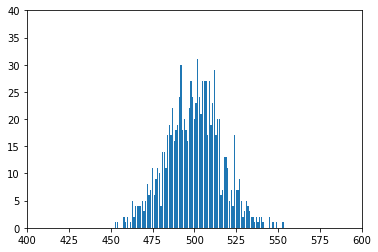

In [75]:
n = 1000
t = 1000
trials = [sum([random.randint(0,1) for i in range(n)]) for j in range(t)]
freq = [trials.count(k) for k in range(n+1)]
plt.axis([400,600,0,40])

plt.bar(range(n+1),freq)

### Continuous Distributions

**EXPONENTIAL**: $P(x;k) = ke^{-kx}, $ $$x \in [0, \infty], k>0$$

* mean $\mu$ = $1/k$, variance  $\sigma$ = $1/k^2$
* This discribution describes the time intervals in a homogeneous Poisson process.

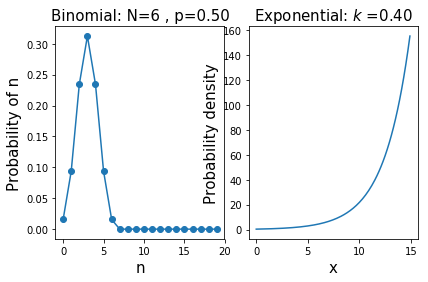

In [32]:
N = 6
p = 0.5
n = np.arange(0,20)
y = stats.binom.pmf(n, N, p)
plt.subplot(1, 2, 1)

plt.plot(n, y, 'o-')
plt.title('Binomial: N=%i , p=%.2f' % (N,p),fontsize=15)
plt.xlabel('n',fontsize=15)
plt.ylabel('Probability of n',fontsize=15)
plt.tight_layout()


k=0.4
x=np.arange(0,15,0.1)
y=k*np.exp(k*x)

plt.subplot(1, 2, 2)
plt.plot(x,y,'-')
plt.title('Exponential: $k$ =%.2f' % k,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()



## The central Limit Theorem (CLT)

| Pop.par.   | Estimator (a r.v.)  | Estimate (a real number)  |   
|:---:|---|---|
| $\mu$ | $$\overline X = \frac{1}{n}  \sum_{i=1}^{n} X_i$$ | $$ \overline x = 'frac{1}{n}  \sum_{i=1}^{n} x_i $$| 
| $\sigma^2$ | $$ S^2 = \frac{1}{n-1}  \sum_{i=1}^{n} (X_i - \overline X)^2 $$ | $$ s^2= \frac{1}{n-1} \sum_{i=1}{n}(x_i - \overline x)^2 $$ |
| $p$ | $$ \hat p = \frac{X}{n}$$ | $$ \hat p = \frac{x}{n}$$ |



If the **population variable is __normally distributed__**, with mean $\mu$ and variance $\sigma^2$, then: $\sum_{i=1}^{n}X_i$ is normal ($n\mu$, $n\sigma^2$) and $\overline X$ is normal ($\mu, \sigma_{\overline X} = \frac{\sigma}{\sqrt{n}}$), so $\frac{\overline X - \mu}{\sigma / \sqrt{n}}$ is standard normal

If $X_1, ..., X_n$ are **inddependent** and **identically distributed** with expectation $\mu$ and variance $\sigma^2$,**for large $n$** the sample mean 

$$\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$	

** approximately** normally distributed with mean $\mu$ and standart deviation $\frac{\sigma}{\sqrt{n}}$, _( rule of thumn n >= 25 )_

* Probability can be **approximated** using the CLT
* The normal approximation of the binomial distribution is a consequence of the CLT

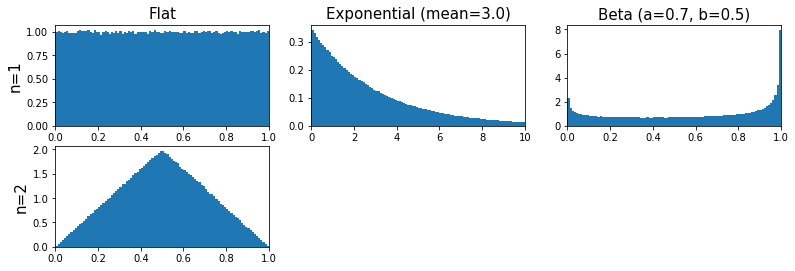

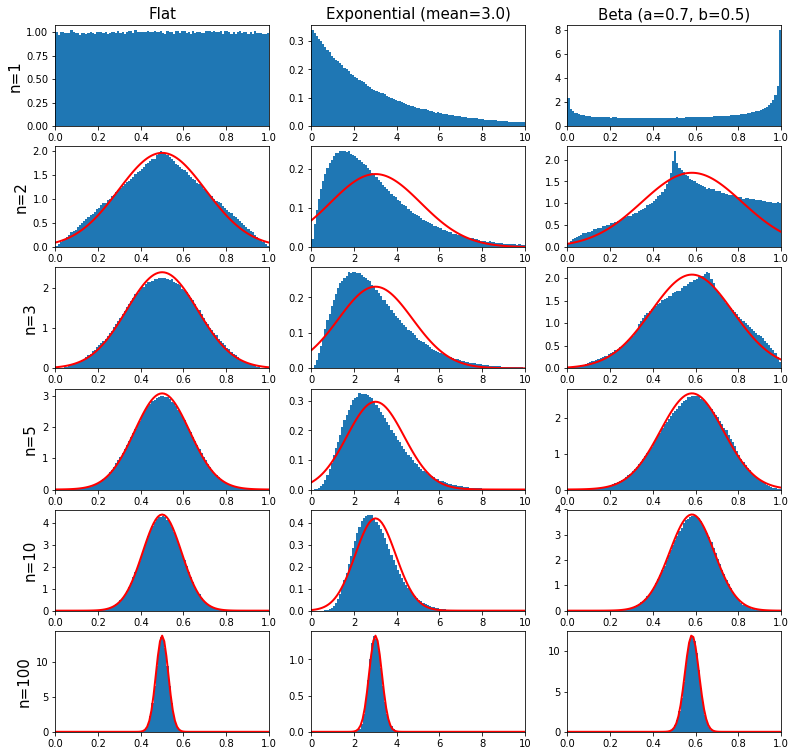

In [23]:
from functools import partial # provides capability to define function with partial arguments
N=1000000 # number of times n samples are taken. Try varying this number.
nobb=101 # number of bin boundaries on plots
n=np.array([1,2,3,5,10,100]) # number of samples to average over

exp_mean=3 # mean of exponential distribution
a,b=0.7,0.5 # parameters of beta distribution

dist=[partial(np.random.random),partial(np.random.exponential,exp_mean),partial(np.random.beta,a,b)]
title_names=["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a,b)]
drange=np.array([[0,1],[0,10],[0,1]]) # ranges of distributions
means=np.array([0.5,exp_mean,a/(a+b)]) # means of distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) # variances of distributions

binrange=np.array([np.linspace(p,q,nobb) for p,q in drange])
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

for i in xrange(ln): # loop over number of n samples to average over
    for j in xrange(ld): # loop over the different distributions
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j],normed=True)
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'r',linewidth=2)     
plt.show()


Reference: [1] [Probability Distributions and the Central Limit Theorem by Mickey Atwal, Cold Spring Harbor Laboratory](http://nbviewer.jupyter.org/url/atwallab.cshl.edu/teaching/distributions.ipynb)

## One Sample: decide which CI

## Concepts of Confidence Intervals 

** Interpretation of a 95%-confidence Interval _($a, b$)_ ** of $\mu$, $p_1$-$p_2$, etc: "We are 95% confident that the true value of ... lies between $a$ and $b$".

** Determining the sample size n** for given sampling error:

$$ SE = z_{\alpha/2}\frac{\alpha}{\sqrt{n}} $$

$$ SE = z_{\alpha/2}\sqrt{\frac{\hat p (p-\hat p}{n}} $$

use the formula 

$$ n >= (\sqrt{z_{\alpha/2}{SE}})^2 $$ 

when there is no information about $p$, choose $p = \frac{1}{2}$

In [25]:
import scipy.special as sp


n = 100 # number of coin flips
h = 61 # number of heads
q = .5 # null-hypothesis of fair coin

# Z-score
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n/(q*(1-q))); z

2.1999999999999997

In [26]:
# from Z-score, computer the p-value
pval = 2 * (1 - stats.norm.cdf(z)); pval

0.02780689502699718

## Concepts of Hypothesis Testing

**Test statistics** andits distribution: **N(0,1)** or **t-disribution**

$H_0$ and $H_a$: in $H_a$ _what you want to prove_.

**Two** or **one sided** tests: one sided is **upper** or **lower tailed**.

**Type I error: rejection $H_0$ if $H_0$ is really true**  
$\alpha$ = the (maximum) probability of a type I error

Two alternative tests (criteria):
    e.g for a lower tailed test,
for given value of α (usually 1%, 5% or 10%):

* Using the reject region: **reject $H_0$ if $T$ $=<$ -$t_\alpha$**
* Using the p-value observation: **reject $H_0$ if $ T =< -t_\alpha$**

Conclusion in words: _"At a significant level of $\alpha$ the observation did / did not prove that..."_

## One Sample Tests

Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true.

Hypothesis Testing can be broken into 10 basic steps.
1. Data Testing
2. Assumptions
3. Hypothesis
4. Test Statistic
5. Distribution of Test Statistic
6. Decision Rule
7. Calculation of Test Statistic
8. Statistical Decision
9. Conclusion
10. p-values

**Step 1: Data Testing**
For any type of statistical testing, we need defined data from a given population.

**Step 2: Assumption**
Next, we create our assumption regarding the data at hand, e.g Is it normally distributed ? What's the standart division of the data? ...Is it T-Distributed or a Normal Distributed. 

**Step 3: Hypothesis** 
In our Hypothesis testing we have to define two Hypothesis: _The Null Hypothesis_ ($H_0$) and Alternative Hypothesis $H_A$. The Null hypothesis is the hypothesis we are looking to test against. 

(define )...

Reference: [2] [Data Science iPython Notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)

Simple Simulation in Python, Sheffield University http://pi3.sites.sheffield.ac.uk/tutorials/week-9#TOC-A-simple-simulation-in-Python